In [24]:
import matplotlib.pyplot as plt
import uproot

df = uproot.open('B2JpsiK0s.root:tree').arrays(['Mbc','isSignal', 
                                                'roeM__bo__bc', 'roeM__bomy_mask__bc', 
                                                'nROE_Charged__bo__bc', 'nROE_Charged__bomy_mask__bc'
                                                ], library='pd')

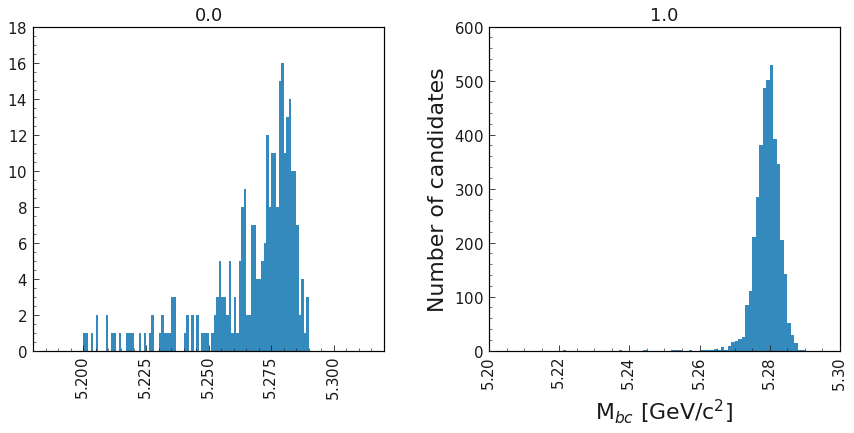

In [29]:
df.hist('Mbc', bins=100, range=(5.2, 5.3), by='isSignal', figsize=(14.0, 6.0))
plt.xlabel(r'M$_{bc}$ [GeV/c$^{2}$]')
plt.ylabel('Number of candidates')
plt.xlim(5.2, 5.3)
plt.style.use("belle2")
plt.savefig('Mbc_all.png')

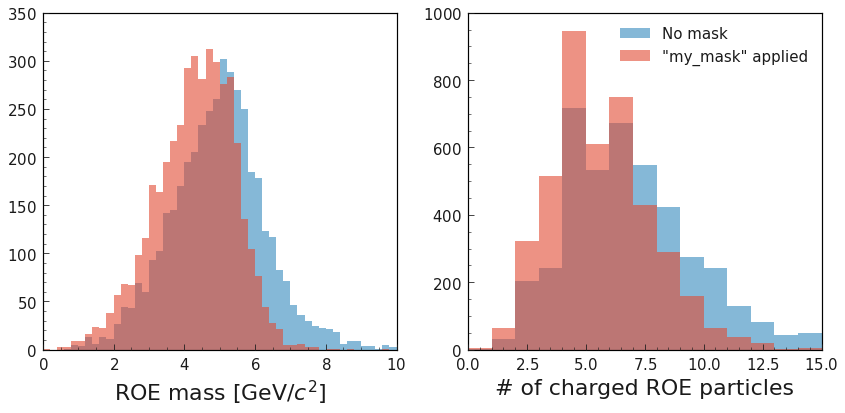

In [27]:
# df.query("isSignal==0").hist('Mbc', bins=100, range=(4.3, 5.3))
fig, ax = plt.subplots(1,2, figsize=(12, 6))

m_range = (0, 10)
ax[0].hist(df['roeM__bo__bc'], label='"my_mask" applied', bins=50, range=m_range, alpha=0.6)
ax[0].hist(df['roeM__bomy_mask__bc'], label='No mask', bins=50, range=m_range, alpha=0.6)
ax[0].set_xlim(m_range)
ax[0].set_xlabel('ROE mass [GeV/$c^2$]')

m_range = (0, 15)
ax[1].hist(df['nROE_Charged__bo__bc'], label='No mask', bins = 15, range=m_range, alpha=0.6)
ax[1].hist(df['nROE_Charged__bomy_mask__bc'], label='"my_mask" applied',bins = 15, range=m_range, alpha=0.6)
ax[1].set_xlim(m_range)
ax[1].set_xlabel('# of charged ROE particles')
ax[1].legend()

fig.tight_layout()
fig.savefig('roe_mask_comparison.svg')